# Predicting the Price of used vehicles based on it’s features and usage details.

## Loading the Required Libraries

In [5]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [6]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.exceptions import NotFittedError
from itertools import chain

In [7]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To analyze the type of missing data
import missingno as msno
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score,GridSearchCV
#For Regression:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Build Model Using Gradient Bossting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
# XGBoost model
from xgboost import XGBRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
import pandas_profiling as pp

C:\Users\Gnanendra\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Gnanendra\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Gnanendra\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Gnanendra\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.star

In [8]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [9]:
import os

In [10]:
os.getcwd()

'C:\\Users\\Gnanendra\\Downloads'

In [11]:
os.chdir("D:\INSOFE\Mith\Data_Forall")

### Reading the Data

In [12]:
#loading data
train = pd.read_csv("TrainData.csv")
test = pd.read_csv("TestData.csv")


In [220]:
pp.ProfileReport(train)

Number of variables,20
Number of observations,58857
Total Missing (%),1.1%
Total size in memory,9.0 MiB
Average record size in memory,160.0 B
Numeric,7
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,3


In [17]:
profile = pp.ProfileReport(train)
profile.to_file(outputfile="trainreport.html")

In [18]:
profile1 = pp.ProfileReport(train)
profile1.to_file(outputfile="testreport.html")

In [221]:
samplesubmission = pd.read_csv("D:/INSOFE/Mith/samplesubmission-1548926597414.csv")

In [13]:
ids = test['VehicleID']

# Exploratory Data Analysis
## Understanding the Data

In [223]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


The train data has 58857 rows and 20 columns
----------------------------
The test data has 19594 rows and 19 columns


In [224]:
train.describe(include='all' )

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
count,58857.000000,58857,58857,58857,58857,58857.000000,57013,58857.000000,57138,58857.000000,58857,58857.000000,58857.000000,56772,58857,52008,58857,58857.0,58857.000000,58857
unique,NaN,12358,40839,1,1,NaN,8,NaN,2,NaN,235,NaN,NaN,7,38,2,77,NaN,NaN,10739
top,NaN,30-03-2016 21:55,Volkswagen_Polo_1.2,private,offer,NaN,limousine,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,No,03-04-2016 00:00,NaN,NaN,06-04-2016 06:45
freq,NaN,17,110,58857,58857,NaN,15670,NaN,42481,NaN,4127,NaN,NaN,31040,11829,48689,2457,NaN,NaN,147
mean,29429.000000,NaN,NaN,NaN,NaN,7638.980971,NaN,2006.286457,NaN,130.013473,NaN,120146.626569,6.217442,NaN,NaN,NaN,NaN,0.0,51941.873881,NaN
std,16990.696734,NaN,NaN,NaN,NaN,6710.787043,NaN,4.016998,NaN,178.318088,NaN,41188.999160,3.458960,NaN,NaN,NaN,NaN,0.0,25639.658736,NaN
min,1.000000,NaN,NaN,NaN,NaN,1001.000000,NaN,2000.000000,NaN,1.000000,NaN,5000.000000,1.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,14715.000000,NaN,NaN,NaN,NaN,2850.000000,NaN,2003.000000,NaN,86.000000,NaN,90000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,31675.000000,NaN
50%,29429.000000,NaN,NaN,NaN,NaN,5400.000000,NaN,2006.000000,NaN,121.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,51067.000000,NaN
75%,44143.000000,NaN,NaN,NaN,NaN,9999.000000,NaN,2009.000000,NaN,163.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,72760.000000,NaN


In [225]:
test.dtypes

VehicleID                      int64
DataCollectedDate             object
NameOfTheVehicle              object
SellerType                    object
OfferType                     object
VehicleType                   object
YearOfVehicleRegistration      int64
GearBoxType                   object
PowerOfTheEngine               int64
ModelOfTheVehicle             object
DistranceTravelled             int64
MonthOfVehicleRegistration     int64
TypeOfTheFuelUsed             object
BrandOfTheVehicle             object
IsDamageRepaired              object
DateOfAdCreation              object
NumberOfPictures               int64
ZipCode                        int64
DateOfAdLastSeen              object
dtype: object

In [226]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,8
1,object,12


### Checking for Missing Values

In [227]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(train)


Your selected dataframe has 20 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
IsDamageRepaired,6849,11.6
TypeOfTheFuelUsed,2085,3.5
VehicleType,1844,3.1
GearBoxType,1719,2.9


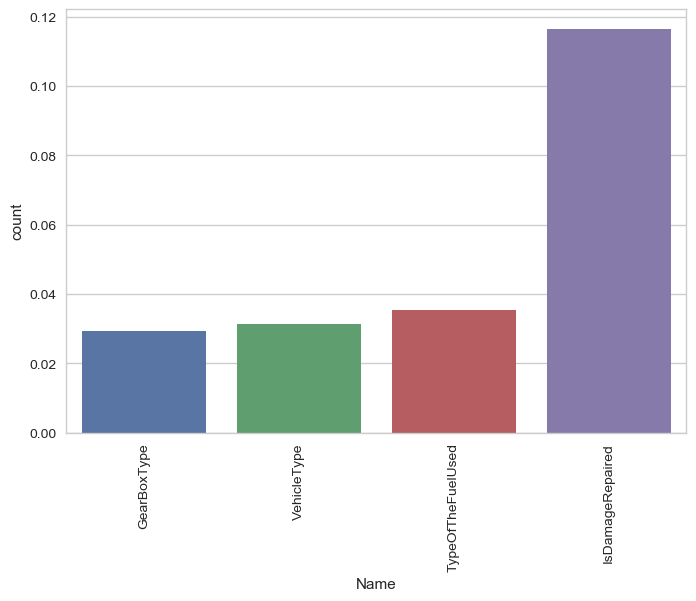

In [228]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index
#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()


### Identifying Unique Values

In [229]:
unique_counts = pd.DataFrame.from_records([(col, train[col].nunique()) for col in train.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts


,Column_Name,Num_Unique
17,NumberOfPictures,1
3,SellerType,1
4,OfferType,1
8,GearBoxType,2
15,IsDamageRepaired,2
13,TypeOfTheFuelUsed,7
6,VehicleType,8
12,MonthOfVehicleRegistration,12
11,DistranceTravelled,13
7,YearOfVehicleRegistration,17


### Dropping the Unique value variables and Vehicle ID, ZIP Code

In [230]:
train = train.drop(['VehicleID', 'NumberOfPictures', 'SellerType', 'OfferType', 'ZipCode'], axis=1)

In [231]:
test = test.drop(['VehicleID', 'NumberOfPictures', 'SellerType', 'OfferType', 'ZipCode'], axis=1)
#train = train.drop(['ZipCode'], axis=1)
#test = test.drop(['ZipCode'], axis=1)

In [232]:
train.shape

(58857, 15)

In [233]:
test.shape

(19594, 14)

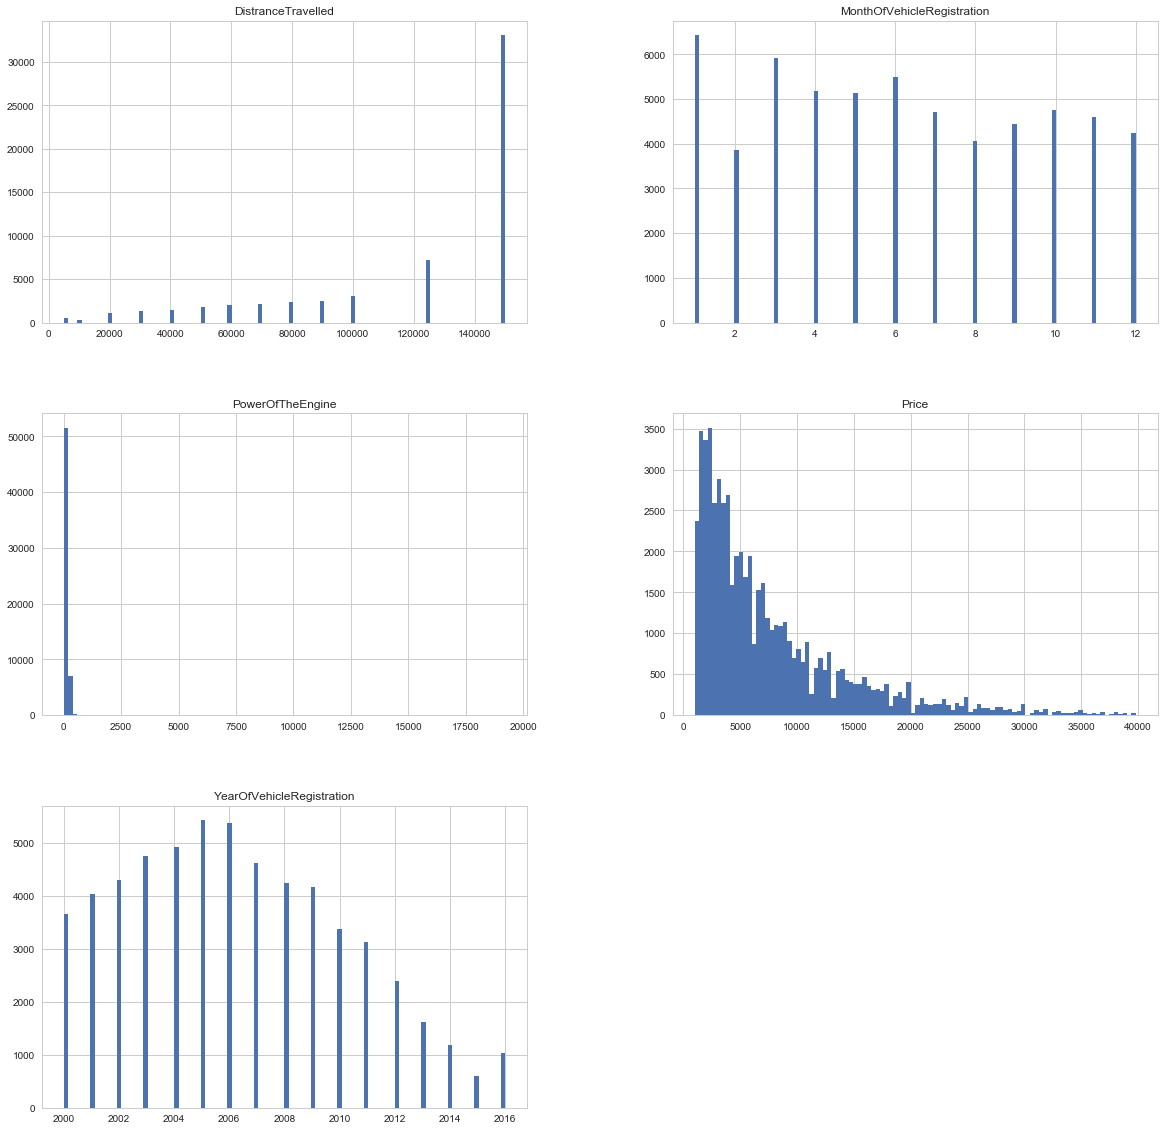

In [234]:
#Histogram of all the varaibles

%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=100, figsize=(20,20))
plt.savefig("attribute_histogram_plots")
plt.show()

### From the above Histogram of all the variables we can understand that  Power of engine, Price variables are right skewed


### Seperating Numerical and Categorical data

In [235]:
#Seperating Catagorical and Numerical Data
numeric_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categorical_data.shape[1]))


There are 5 numeric and 10 categorical columns in train data


#### Visualizing the Target Variable which is Price

In [236]:
# Distribution of Targer variable
train['Price'].describe()

count    58857.000000
mean      7638.980971
std       6710.787043
min       1001.000000
25%       2850.000000
50%       5400.000000
75%       9999.000000
max      39800.000000
Name: Price, dtype: float64

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


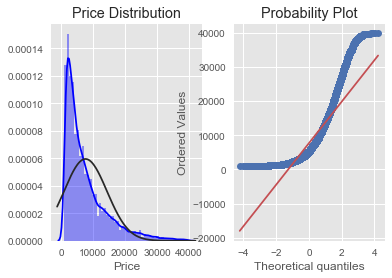

Skewness: 1.741881
Kurtosis: 3.239900


In [237]:
# Let us analyse the Target
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use(style='ggplot')

#Check the Skewness and Kurtosis of Target variable
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Price Distribution")
sns.distplot(train.Price.dropna(), fit=stats.norm, color='blue')
plt.subplot(1, 2, 2)
stats.probplot(train.Price, plot=plt)
plt.show()
print("Skewness: %f" % train.Price.skew())
print("Kurtosis: %f" % train.Price.kurt())


In [238]:
# Skewness and Curtosis
print("Skewness: %f" % train['Price'].skew())
print("Kurtosis: %f" % train['Price'].kurt())

Skewness: 1.741881
Kurtosis: 3.239900


In [239]:
# Transformation: use np.log() totransform trian.SalePrice and Calculate Skewness and Kurtoisis
target = np.log(train.Price)
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 0.104807
Kurtosis: -0.798373


C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


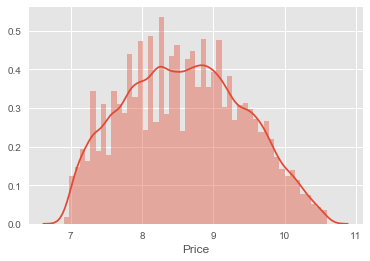

In [240]:
# histogram After log transformation
sns.distplot(np.log(train['Price']))

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


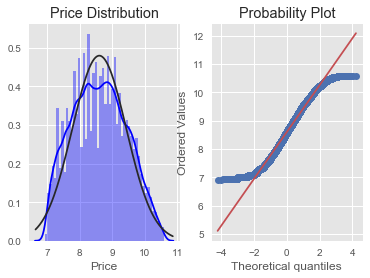

Skewness: 0.104807
Kurtosis: -0.798373


In [241]:
#Check the Skewness and Kurtosis of Target variable
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Price Distribution")
sns.distplot(np.log(train.Price).dropna(), fit=stats.norm, color='blue')
plt.subplot(1, 2, 2)
stats.probplot(np.log(train.Price), plot=plt)
plt.show()
print("Skewness: %f" % np.log(train.Price).skew())
print("Kurtosis: %f" % np.log(train.Price).kurt())

#### Understanding the Relationship between Numerical veraibles and Target Variable

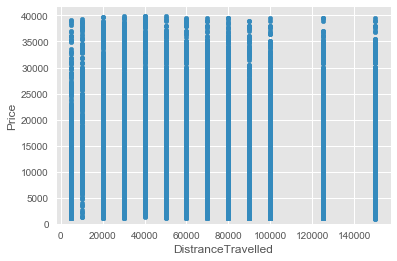

In [242]:
var = 'DistranceTravelled'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))

#### From the above Scatter plot it seems Distance travelled vs Price is continuous it looks categorical, May be Distance travelled is rounded off

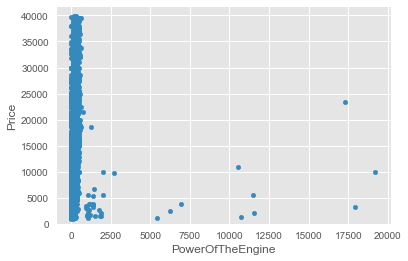

In [243]:
var = 'PowerOfTheEngine'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))

#### From the above scatter plot between Price and Power of the engine, it looks like power of the engine situated below 2500 and there are very few above the 7500

In [244]:
#There are some out liers, >10000, Let us remove them
train = train[train['PowerOfTheEngine'] < 10000]

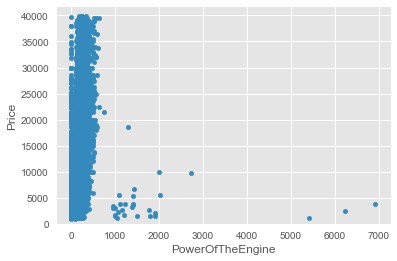

In [245]:
var = 'PowerOfTheEngine'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))

In [246]:
numeric_columns = numeric_data.columns
numeric_columns

Index(['Price', 'YearOfVehicleRegistration', 'PowerOfTheEngine',
       'DistranceTravelled', 'MonthOfVehicleRegistration'],
      dtype='object')

In [247]:
categorical_columns = categorical_data.columns
categorical_columns

Index(['DataCollectedDate', 'NameOfTheVehicle', 'VehicleType', 'GearBoxType',
       'ModelOfTheVehicle', 'TypeOfTheFuelUsed', 'BrandOfTheVehicle',
       'IsDamageRepaired', 'DateOfAdCreation', 'DateOfAdLastSeen'],
      dtype='object')

### Unnderstand the relation between Categorical Variables and Target Price

(-0.5, 6.5, 0, 50000)

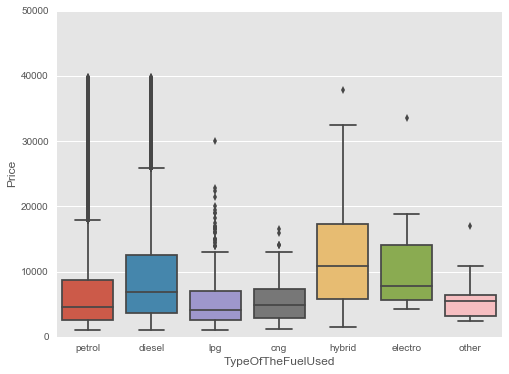

In [248]:
# Relatoinship with Caregorical Features
var = 'TypeOfTheFuelUsed'
data = pd.concat([train['Price'], train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='Price',data=data)
fig.axis(ymin=0, ymax=50000)

#### From the above box plot we can understand that Price value of the vehicle not varying with respect to type of the fuel used. Also there are some outlier in Petrol, diesel and lpg fuel types

(-0.5, 1.5, 0, 45000)

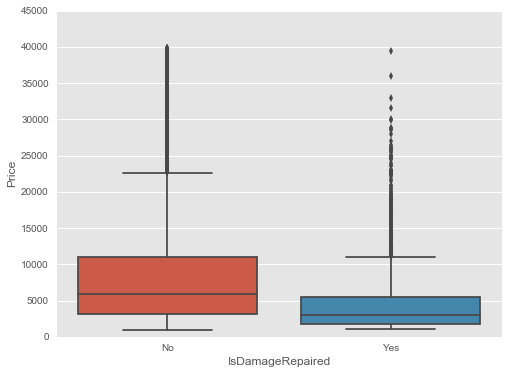

In [249]:
# Relatoinship with Caregorical Features
var = 'IsDamageRepaired'
data = pd.concat([train['Price'], train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='Price',data=data)
fig.axis(ymin=0, ymax=45000)

##### Suprisingly, it is less price for the vehilcles which are repaired and there are many outliers too

(-0.5, 1.5, 0, 45000)

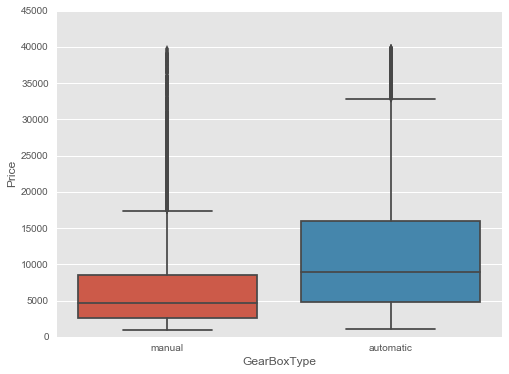

In [250]:
# Relatoinship with Caregorical Features
var = 'GearBoxType'
data = pd.concat([train['Price'], train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='Price',data=data)
fig.axis(ymin=0, ymax=45000)

#### From the above plot it is clear statement that price of the automatic gear type vehicles is high

In [251]:
# Calcution correlation between all numeric features
corr = numeric_data.corr()
print(corr['Price'].sort_values(ascending=False)[:10])
print(corr['Price'].sort_values(ascending=False)[-5:])

Price                         1.000000
YearOfVehicleRegistration     0.602540
PowerOfTheEngine              0.198645
MonthOfVehicleRegistration    0.026637
DistranceTravelled           -0.440275
Name: Price, dtype: float64
Price                         1.000000
YearOfVehicleRegistration     0.602540
PowerOfTheEngine              0.198645
MonthOfVehicleRegistration    0.026637
DistranceTravelled           -0.440275
Name: Price, dtype: float64


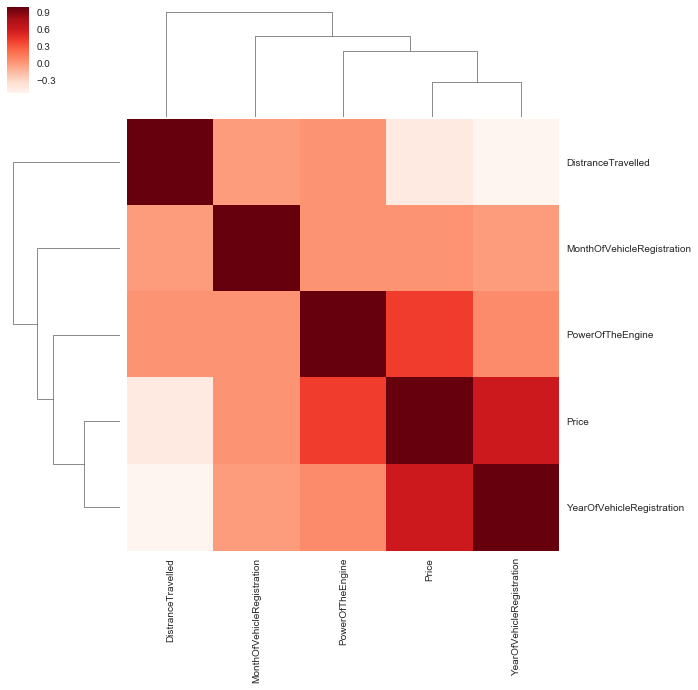

In [252]:
k = 10
cols = corr.nlargest(k , 'Price')['Price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , cmap = "Reds",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

In [253]:
#let's check the mean price per GearBoxType and plot it.
from scipy import stats
from scipy.stats import norm
pivot = train.pivot_table(index='GearBoxType', values='Price', aggfunc=np.median)

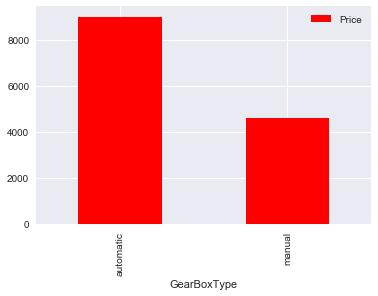

In [254]:
pivot.plot(kind='bar', color='red')

In [255]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='TypeOfTheFuelUsed', values='Price', aggfunc=np.median)
pivot.sortlevel

<bound method DataFrame.sortlevel of                      Price
TypeOfTheFuelUsed         
cng                 4900.0
diesel              6900.0
electro             7750.0
hybrid             10900.0
lpg                 4150.0
other               5424.5
petrol              4550.0>

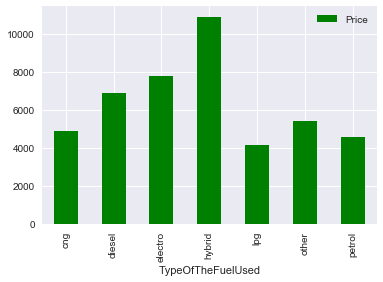

In [256]:
pivot.plot(kind='bar', color='green')

In [257]:
pivot = train.pivot_table(index='IsDamageRepaired', values='Price', aggfunc=np.median)

In [258]:
pivot.sortlevel

<bound method DataFrame.sortlevel of                   Price
IsDamageRepaired       
No                 5950
Yes                2999>

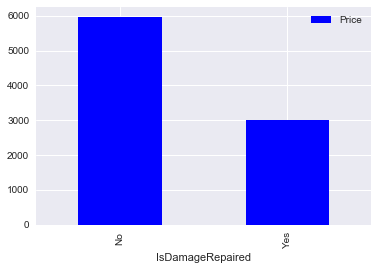

In [259]:
pivot.plot(kind='bar', color='blue')

In [260]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Price'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')



In [261]:
categorical_data = train.select_dtypes(exclude=[np.number])


C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<module 'matplotlib.pyplot' from 'C:\\Users\\Gnanendra\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

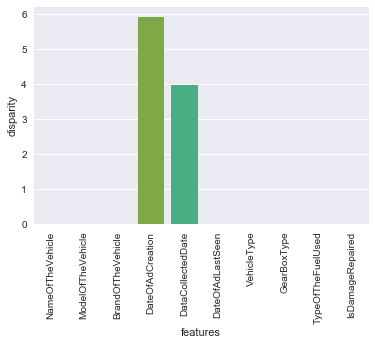

In [144]:
categorical_data['Price'] = train.Price.values
k = anova(categorical_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg 

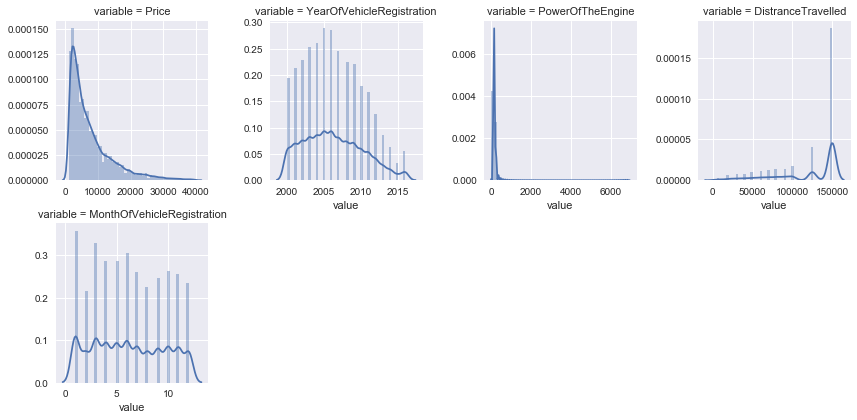

In [141]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [262]:
date_data = categorical_data[['DataCollectedDate','DateOfAdCreation', 'DateOfAdLastSeen']]

In [263]:
date_data.head()

,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen
0,03-04-2016 11:54,03-04-2016 00:00,07-04-2016 13:15
1,08-03-2016 19:54,08-03-2016 00:00,11-03-2016 17:15
2,26-03-2016 17:38,26-03-2016 00:00,26-03-2016 17:38
3,11-03-2016 13:42,11-03-2016 00:00,12-03-2016 02:45
4,17-03-2016 17:49,17-03-2016 00:00,07-04-2016 04:17


### Data Collected date will not have impact let us drop it

In [264]:
date_data = date_data.drop(['DataCollectedDate'], axis=1)

In [265]:
train = train.drop(['DataCollectedDate'], axis=1)
test = test.drop(['DataCollectedDate'], axis=1)

In [266]:
train.shape

(58850, 14)

In [267]:
test.shape

(19594, 13)

In [268]:
date_data.head()

,DateOfAdCreation,DateOfAdLastSeen
0,03-04-2016 00:00,07-04-2016 13:15
1,08-03-2016 00:00,11-03-2016 17:15
2,26-03-2016 00:00,26-03-2016 17:38
3,11-03-2016 00:00,12-03-2016 02:45
4,17-03-2016 00:00,07-04-2016 04:17


In [270]:
date_data['DateOfAdCreation']=pd.to_datetime(train['DateOfAdCreation'],format="%d-%m-%Y %H:%M")

In [272]:
date_data['DateOfAdLastSeen']=pd.to_datetime(train['DateOfAdLastSeen'],format="%d-%m-%Y %H:%M")

In [ ]:
date_data['DateOfAdCreation']=pd.to_datetime(train['DateOfAdCreation'],format="%d-%m-%Y %H:%M")

In [273]:
date_data.head()

,DateOfAdCreation,DateOfAdLastSeen
0,2016-04-03,2016-04-07 13:15:00
1,2016-03-08,2016-03-11 17:15:00
2,2016-03-26,2016-03-26 17:38:00
3,2016-03-11,2016-03-12 02:45:00
4,2016-03-17,2016-04-07 04:17:00


In [274]:
date_data['YearofAdCreation'] = pd.DatetimeIndex(date_data['DateOfAdCreation']).year
date_data['YearofAdLastSeen'] = pd.DatetimeIndex(date_data['DateOfAdLastSeen']).year

In [275]:
date_data['MonthofAdCreation'] = pd.DatetimeIndex(date_data['DateOfAdCreation']).month
date_data['MonthofAdLastSeen'] = pd.DatetimeIndex(date_data['DateOfAdLastSeen']).month

In [276]:
date_data['DayofAdCreation'] = pd.DatetimeIndex(date_data['DateOfAdCreation']).day
date_data['DayofAdLastSeen'] = pd.DatetimeIndex(date_data['DateOfAdLastSeen']).day

In [277]:
date_data.head()

,DateOfAdCreation,DateOfAdLastSeen,YearofAdCreation,YearofAdLastSeen,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen
0,2016-04-03,2016-04-07 13:15:00,2016,2016,4,4,3,7
1,2016-03-08,2016-03-11 17:15:00,2016,2016,3,3,8,11
2,2016-03-26,2016-03-26 17:38:00,2016,2016,3,3,26,26
3,2016-03-11,2016-03-12 02:45:00,2016,2016,3,3,11,12
4,2016-03-17,2016-04-07 04:17:00,2016,2016,3,4,17,7


In [337]:
date_data.to_csv("Date_Data1.csv", index=True)

## Dropping the Year columns as all the data from same year

In [279]:
date_data = date_data.drop(['DateOfAdCreation','DateOfAdLastSeen','YearofAdCreation','YearofAdLastSeen'], axis= 1)

In [280]:
date_data.head()

,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen
0,4,4,3,7
1,3,3,8,11
2,3,3,26,26
3,3,3,11,12
4,3,4,17,7


In [281]:
test['MonthofAdCreation'] = pd.DatetimeIndex(test['DateOfAdCreation']).month
test['MonthofAdLastSeen'] = pd.DatetimeIndex(test['DateOfAdLastSeen']).month

In [282]:
test['DayofAdCreation'] = pd.DatetimeIndex(test['DateOfAdCreation']).day
test['DayofAdLastSeen'] = pd.DatetimeIndex(test['DateOfAdLastSeen']).day

In [283]:
test = test.drop(['DateOfAdCreation','DateOfAdLastSeen'], axis = 1)

### Dealing with missing values in Categorical Data

In [284]:
missing_values_table(train)

Your selected dataframe has 14 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
IsDamageRepaired,6847,11.6
TypeOfTheFuelUsed,2083,3.5
VehicleType,1844,3.1
GearBoxType,1719,2.9


In [285]:
missing_values_table(categorical_data)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
IsDamageRepaired,6847,11.6
TypeOfTheFuelUsed,2083,3.5
VehicleType,1844,3.1
GearBoxType,1719,2.9


In [286]:
train['IsDamageRepaired'].describe()

count     52003
unique        2
top          No
freq      48684
Name: IsDamageRepaired, dtype: object

In [287]:
train['TypeOfTheFuelUsed'].describe()

count      56767
unique         7
top       petrol
freq       31038
Name: TypeOfTheFuelUsed, dtype: object

In [288]:
train['VehicleType'].describe()

count         57006
unique            8
top       limousine
freq          15668
Name: VehicleType, dtype: object

In [289]:
train['GearBoxType'].describe()

count      57131
unique         2
top       manual
freq       42477
Name: GearBoxType, dtype: object

#### Replacing the missing values in Catagorical attributes with Mode

In [290]:
cat_imputation = categorical_data.copy()

In [291]:
missing_values_table(cat_imputation)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
IsDamageRepaired,6847,11.6
TypeOfTheFuelUsed,2083,3.5
VehicleType,1844,3.1
GearBoxType,1719,2.9


In [293]:
cat_imputation.columns

Index(['DataCollectedDate', 'NameOfTheVehicle', 'VehicleType', 'GearBoxType',
       'ModelOfTheVehicle', 'TypeOfTheFuelUsed', 'BrandOfTheVehicle',
       'IsDamageRepaired', 'DateOfAdCreation', 'DateOfAdLastSeen'],
      dtype='object')

In [300]:
cat_imputation = cat_imputation.drop(['NameOfTheVehicle'], axis=1)

In [303]:
cat_imputation.head()

,VehicleType,GearBoxType,TypeOfTheFuelUsed,IsDamageRepaired
0,Small Car,manual,petrol,No
1,Combi,manual,diesel,No
2,limousine,automatic,diesel,No
3,limousine,manual,diesel,No
4,Combi,manual,petrol,No


In [309]:
cat_dum = pd.get_dummies(cat_imputation, drop_first=True)

In [310]:
cat_dum.head()

,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [311]:
missing_values_table(cat_dum)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [312]:
date_data.head()

,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen
0,4,4,3,7
1,3,3,8,11
2,3,3,26,26
3,3,3,11,12
4,3,4,17,7


In [313]:
cat_date = pd.concat([date_data, cat_dum], axis=1)

In [314]:
cat_date.head()

,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [315]:
train.head()

,NameOfTheVehicle,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,DateOfAdLastSeen
0,Subaru_G3X_Justy_1.3,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,03-04-2016 00:00,07-04-2016 13:15
1,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,08-03-2016 00:00,11-03-2016 17:15
2,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,5990,limousine,2007,automatic,150,c_klasse,150000,2,diesel,mercedes_benz,No,26-03-2016 00:00,26-03-2016 17:38
3,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,4000,limousine,2005,manual,150,147,150000,9,diesel,alfa_romeo,No,11-03-2016 00:00,12-03-2016 02:45
4,Audi_A4,12950,Combi,2005,manual,200,a4,125000,3,petrol,audi,No,17-03-2016 00:00,07-04-2016 04:17


In [316]:
## Dropping the the columns from Train Data
train1 = train.copy()

In [317]:
train = train.drop(['NameOfTheVehicle','ModelOfTheVehicle','BrandOfTheVehicle','DateOfAdCreation','DateOfAdLastSeen'], axis=1)

In [318]:
train.shape

(58850, 9)

In [319]:
test.shape

(19594, 15)

In [320]:
train = pd.concat([train, cat_date], axis=1)

In [324]:
train.head()

,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,IsDamageRepaired,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,3850,Small Car,2004,manual,94,50000,7,petrol,No,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5999,Combi,2007,manual,140,150000,5,diesel,No,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,5990,limousine,2007,automatic,150,150000,2,diesel,No,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4000,limousine,2005,manual,150,150000,9,diesel,No,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,12950,Combi,2005,manual,200,125000,3,petrol,No,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [323]:
test.head()

,NameOfTheVehicle,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen
0,"Jeep_Grand_Cherokee_""Overland""",suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,3,5,14,4
1,VW_PASSAT_1.9_TDI_131_PS_LEDER,Combi,2004,manual,131,passat,150000,2,NaN,volkswagen,No,3,3,21,23
2,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,suv,2011,manual,190,navara,70000,3,diesel,nissan,No,3,6,21,4
3,Ford_C_MAX_2.0_TDCi_DPF_Titanium,bus,2007,manual,136,c_max,150000,6,diesel,ford,No,3,5,23,4
4,BMW_530d_touring_Vollausstattung_NAVI,Combi,2002,automatic,193,5er,150000,9,diesel,bmw,Yes,3,3,18,18


In [325]:
test = test.drop(['NameOfTheVehicle','ModelOfTheVehicle','BrandOfTheVehicle'], axis=1)

In [326]:
cat_test_cols = ['IsDamageRepaired','TypeOfTheFuelUsed','VehicleType','GearBoxType']

In [327]:
test = pd.get_dummies(test,columns=cat_test_cols,drop_first=True,)

In [329]:
test.shape

(19594, 23)

In [330]:
train.shape

(58850, 28)

In [331]:
train = train.drop(['IsDamageRepaired','TypeOfTheFuelUsed','VehicleType','GearBoxType'],axis=True)

In [332]:
test.shape

(19594, 23)

In [333]:
train.shape

(58850, 24)

In [334]:
train.head()

,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,3850,2004,94,50000,7,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5999,2007,140,150000,5,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,5990,2007,150,150000,2,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4000,2005,150,150000,9,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,12950,2005,200,125000,3,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [335]:
test.head()

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual
0,2004,163,125000,8,3,5,14,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2004,131,150000,2,3,3,21,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,190,70000,3,3,6,21,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2007,136,150000,6,3,5,23,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2002,193,150000,9,3,3,18,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
train.to_csv("train_final.csv", index=True)

In [340]:
test.to_csv("test_final.csv", index=True)

In [341]:
#Replacing all the 0 month values to 1
train.MonthOfVehicleRegistration.replace(0,1,inplace=True)


In [342]:
# Making the year and month column to get a single date
Purchase_Datetime_train=pd.to_datetime(train.YearOfVehicleRegistration*10000+train.MonthOfVehicleRegistration*100+1,format='%Y%m%d')


In [357]:
test.MonthOfVehicleRegistration.replace(0,1,inplace=True)

In [358]:
Purchase_Datetime_test=pd.to_datetime(test.YearOfVehicleRegistration*10000+test.MonthOfVehicleRegistration*100+1,format='%Y%m%d')

In [359]:
Purchase_Datetime_test.head(10)

0   2004-08-01
1   2004-02-01
2   2011-03-01
3   2007-06-01
4   2002-09-01
5   2006-11-01
6   2016-01-01
7   2006-10-01
8   2007-08-01
9   2008-10-01
dtype: datetime64[ns]

In [354]:
train['Purchase_date'] = Purchase_Datetime

In [360]:
test['Purchase_date'] = Purchase_Datetime_test

In [355]:
Present_date

datetime.date(2019, 2, 1)

In [356]:
train.to_csv("traindate.csv", index=True)

In [362]:
test.to_csv("testdate.csv",index=True)

In [14]:
train_final = pd.read_csv("traindate.csv")
test_final = pd.read_csv("testdate.csv")

In [15]:
train_final.head()

,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes,Purchase_date,Present Date,Days_Old
0,3850,2004,94,50000,7,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,7/1/2004,2/2/2019,5329
1,5999,2007,140,150000,5,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,5/1/2007,2/2/2019,4295
2,5990,2007,150,150000,2,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2/1/2007,2/2/2019,4384
3,4000,2005,150,150000,9,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,9/1/2005,2/2/2019,4902
4,12950,2005,200,125000,3,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3/1/2005,2/2/2019,5086


In [16]:
test_final.head()

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,Purchase_date,Present Date,Days_Old
0,2004,163,125000,8,3,5,14,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,8/1/2004,2/2/2019,5298
1,2004,131,150000,2,3,3,21,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2/1/2004,2/2/2019,5480
2,2011,190,70000,3,3,6,21,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,3/1/2011,2/2/2019,2895
3,2007,136,150000,6,3,5,23,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,6/1/2007,2/2/2019,4264
4,2002,193,150000,9,3,3,18,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9/1/2002,2/2/2019,5998


In [17]:
train_final1 = train_final.drop(['Purchase_date', 'Present Date','YearOfVehicleRegistration','MonthOfVehicleRegistration'], axis=1)

In [18]:
test_final1 = test_final.drop(['YearOfVehicleRegistration','MonthOfVehicleRegistration','Purchase_date', 'Present Date'], axis=1)

In [19]:
test_final1.columns

Index(['PowerOfTheEngine', 'DistranceTravelled', 'MonthofAdCreation',
       'MonthofAdLastSeen', 'DayofAdCreation', 'DayofAdLastSeen',
       'IsDamageRepaired_Yes', 'TypeOfTheFuelUsed_diesel',
       'TypeOfTheFuelUsed_electro', 'TypeOfTheFuelUsed_hybrid',
       'TypeOfTheFuelUsed_lpg', 'TypeOfTheFuelUsed_other',
       'TypeOfTheFuelUsed_petrol', 'VehicleType_Other',
       'VehicleType_Small Car', 'VehicleType_bus', 'VehicleType_cabrio',
       'VehicleType_coupe', 'VehicleType_limousine', 'VehicleType_suv',
       'GearBoxType_manual', 'Days_Old'],
      dtype='object')

In [20]:
test_final1.shape

(19594, 22)

In [21]:
train_final1.shape

(58850, 23)

#### Preprocessing of the data has been done, now we will move to splitting of the data and model buidling

### Splitiing the Data into Train and Test

In [22]:
## Split the data into X and y
X = train_final1.drop("Price",axis=1)
y = np.log(train_final1.Price)

In [23]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=1, test_size=0.2)

In [24]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47080, 22)
(11770, 22)
(47080,)
(11770,)


### Buliding Linear Regression Model

In [21]:
# Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [22]:
# Fit the Model 
model_lr = lr.fit(X_train, y_train)

In [23]:
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_lr.score(X_test, y_test))

R^2 is: 
 0.6780196626572054


In [24]:
# Predictions
y_pred_lr = model_lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
print ('MSE is: \n', mean_squared_error(y_test, y_pred_lr))

MSE is: 
 0.22304140841518647


In [26]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_lr,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_lr,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_lr,y_test)))

Mean absolute Error: 0.33049097115112563
Mean Squared Error: 0.22304140841518647
Root Mean Square error: 0.4722725996870732


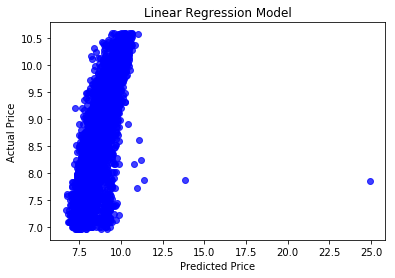

In [27]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_lr, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [28]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
# Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
# Fit the Model 
model_lr = lr.fit(X_train, y_train)
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_lr.score(X_test, y_test))

R^2 is: 
 -0.686907664635215


In [30]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_lr,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_lr,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_lr,y_test)))

Mean absolute Error: 0.33049097115112563
Mean Squared Error: 0.22304140841518647
Root Mean Square error: 0.4722725996870732


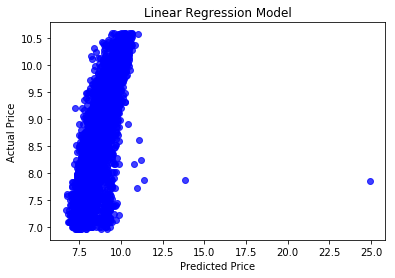

In [31]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_lr, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [32]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Model 2 Building Ridge Regression Model

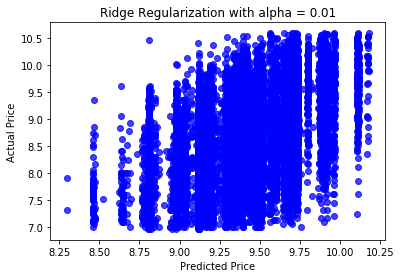

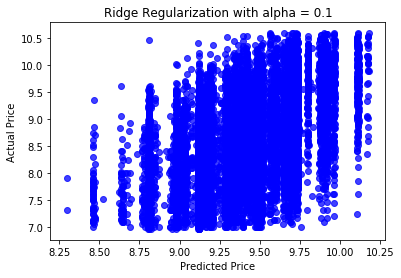

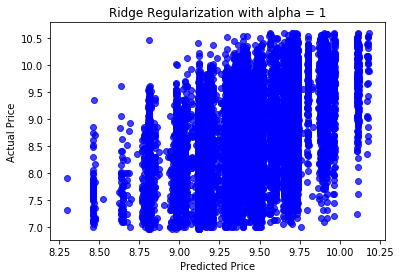

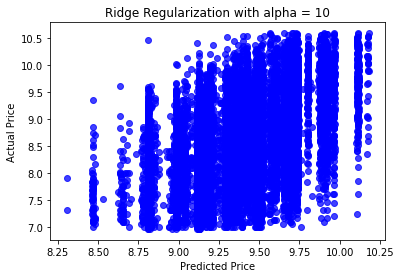

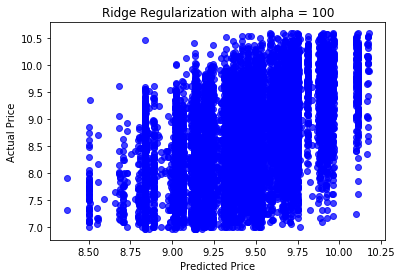

In [33]:

# Model2 using Ridge Regularization
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    plt.scatter(y_pred_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                     np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

### As per the above output there is no much change in between Actual price and Predicted Price, So Ridge regression may not perform well on this data set

### As per the basic regression model building Gradient boosting performing Well on the test data

In [441]:
GB = GradientBoostingRegressor()
# Fit the Model 
model_GB = GB.fit(X_train, y_train)
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_GB.score(X_test, y_test))

R^2 is: 
 0.03571057428296054


In [442]:
# Predictions
y_pred_GB= model_GB.predict(X_test)

In [447]:
# Evaluating the algorithm
from sklearn import metrics
print("Gradient Boosting Mean absolute Error:", metrics.mean_absolute_error(y_pred_GB,y_test))
print("Gradient Boosting Mean Squared Error:", metrics.mean_squared_error(y_pred_GB,y_test))
print("Gradient Boosting Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_GB,y_test)))

Gradient Boosting Mean absolute Error: 0.6834133684763378
Gradient Boosting Mean Squared Error: 0.6679801425352873
Gradient Boosting Root Mean Square error: 0.8173005215557416


In [450]:
GB_predictions = model_GB.predict(test_final1)

In [451]:
len(GB_predictions)

19594

In [454]:
GB_predictions

array([8.65717078, 7.6841755 , 9.51242355, ..., 8.05013681, 7.51176657,
       9.41299369])

In [455]:
final_GB_predictions = np.exp(GB_predictions)

In [456]:
output_GB = pd.DataFrame({ 'VehicleID' : ids, 'Price': final_GB_predictions})
output_GB.to_csv("final_GB_predictions.csv", index = False)
output_GB.head()


,VehicleID,Price
0,60001,5751.240088
1,60002,2173.677041
2,60003,13526.737412
3,60004,4717.237802
4,60005,3762.180198


### Using Random Search for the hyperparameters

In [26]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [27]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)